Subquestion 1: Which types of public transport have been affected most from the COVID pandemic? Are there larger changes in certain types of transport than others?


In [55]:
import os
import pandas as pd
import matplotlib.pyplot as plt

filename_part = "Mobility_trend__per_stage__travel_modes_06102025_113641.csv"
#looking for the file starting from the notebook
start_dir = os.getcwd()

found_path = None

#Because the file could not be found on every laptop, we created a forloop that searches for the specific title on each seperate map, 
#When found, it returns the correct file needed. 

for root, dirs, files in os.walk(start_dir):
    for file in files:
        if filename_part in file:
            found_path = os.path.join(root, file)
            break
    if found_path:
        break

# CSV reading
df = pd.read_csv(found_path, sep=";", encoding="utf-8", header=0)


print(df.head())

print(df.columns.tolist())

                     Sex             Age Modes of travel  \
0  Total male and female  18 to 24 years           Total   
1  Total male and female  18 to 24 years           Total   
2  Total male and female  18 to 24 years           Total   
3  Total male and female  18 to 24 years           Total   
4  Total male and female  18 to 24 years           Total   

                             Travel motives Margins Periods  \
0  Travel to/from work, (non)-daily commute   Value   2014*   
1  Travel to/from work, (non)-daily commute   Value   2015*   
2  Travel to/from work, (non)-daily commute   Value   2016*   
3  Travel to/from work, (non)-daily commute   Value   2017*   
4  Travel to/from work, (non)-daily commute   Value   2018*   

  Stages per person per day (average) (number)  \
0                                         0.82   
1                                         0.79   
2                                         0.79   
3                                         0.80   
4         

In [50]:
df_motive = df[df["Travel motives"]=="Travel to/from work, (non)-daily commute"]
print(df_motive.head())


                     Sex             Age Modes of travel  \
0  Total male and female  18 to 24 years           Total   
1  Total male and female  18 to 24 years           Total   
2  Total male and female  18 to 24 years           Total   
3  Total male and female  18 to 24 years           Total   
4  Total male and female  18 to 24 years           Total   

                             Travel motives Margins Periods  \
0  Travel to/from work, (non)-daily commute   Value   2014*   
1  Travel to/from work, (non)-daily commute   Value   2015*   
2  Travel to/from work, (non)-daily commute   Value   2016*   
3  Travel to/from work, (non)-daily commute   Value   2017*   
4  Travel to/from work, (non)-daily commute   Value   2018*   

  Stages per person per day (average) (number)  \
0                                         0.82   
1                                         0.79   
2                                         0.79   
3                                         0.80   
4         

Stages per person per day (average) (number)                     float64
Distance travelled per stage (average) (passenger kilometres)    float64
Population                                                       float64
dtype: object
   Stages per person per day (average) (number)  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                          0.05   

   Distance travelled per stage (average) (passenger kilometres)  Population  
0                                                NaN              16829289.0  
1                                                NaN              16900726.0  
2                                                NaN              16979120.0  
3                                                NaN              17081507.0  
4                                              0.776             

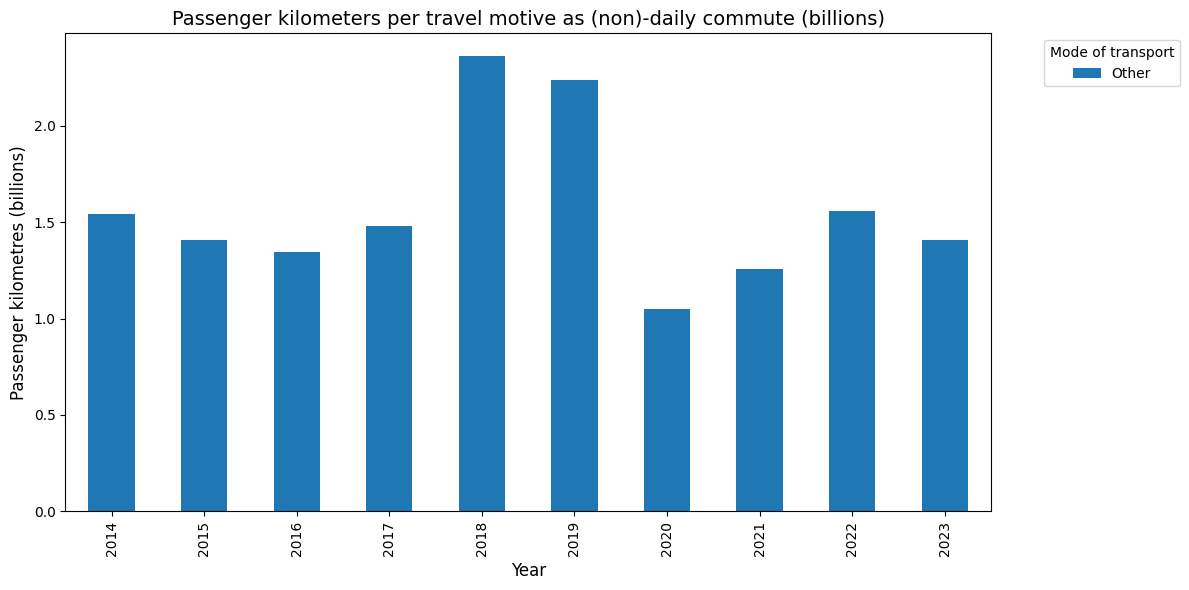

In [56]:
#staven
#dataframe alleen filteren voor werkverkeer. per mode of travel, per jaar, aantal kilometers

#df_motive = df_motive.iloc[:, [3, 6, 8]]
days_per_year = 365


pop = pd.read_csv("bontwikkeling.csv", sep=';', skiprows=4)  # Read population data
pop.columns = ["Year", "Population"]  # Set column names
pop = pop[pop["Year"].str.match(r"^\d{4}$", na=False)]  # Filter rows with valid year format
pop["Year"] = pop["Year"].astype(int)  # Convert 'Year' to integer
pop["Population"] = pd.to_numeric(pop["Population"], errors="coerce")  # Convert 'Population' to numeric


df["Periods"] = (df["Periods"].astype(str).str.replace("*", "", regex=False).str.strip())
df["Periods"] = pd.to_numeric(df["Periods"], errors="coerce")

df["Periods"] = df["Periods"].astype(int)

df["Stages per person per day (average) (number)"] = pd.to_numeric(
    df["Stages per person per day (average) (number)"], errors="coerce"
)

df["Distance travelled per stage (average) (passenger kilometres)"] = pd.to_numeric(
    df["Distance travelled per stage (average) (passenger kilometres)"], errors="coerce"
)

#multiply distance and stages

df["Distance travelled per stage (average) (passenger kilometres)"] = (
    df["Stages per person per day (average) (number)"]
    * df["Distance travelled per stage (average) (passenger kilometres)"]
)

df = df[df["Modes of travel"].isin(["Other"])]
df = df[df["Travel motives"] == "Travel to/from work, (non)-daily commute"]
df = df[df["Periods"].between(2014, 2024)]


merged = pd.merge(df, pop, left_on="Periods", right_on="Year", how="left")


#Convert everything to numeric
cols_to_num = [
    "Stages per person per day (average) (number)",
    "Distance travelled per stage (average) (passenger kilometres)",
    "Population"
]

for col in cols_to_num:
    merged[col] = pd.to_numeric(merged[col], errors="coerce")

print(merged[cols_to_num].dtypes)
print(merged[cols_to_num].head())
# Calculate total passenger kilometres annually
merged["Total passenger kilometres (annual)"] = (
    merged["Stages per person per day (average) (number)"] *
    merged["Distance travelled per stage (average) (passenger kilometres)"] *
    merged["Population"] *
    days_per_year
)


merged["Total passenger kilometres (annual, billions)"] = (
    merged["Total passenger kilometres (annual)"] / 1000000000
)

# Convert distance and stage column to numeric

pivot_df = merged.pivot_table(
    index="Periods",
    columns="Modes of travel",
    values="Total passenger kilometres (annual, billions)",
    aggfunc="sum"
)

plt.figure(figsize=(12, 6))
pivot_df.plot(kind="bar", stacked=True, ax=plt.gca())
plt.title("Passenger kilometers per travel motive as (non)-daily commute (billions)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Passenger kilometres (billions)", fontsize=12)
plt.legend(title="Mode of transport", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




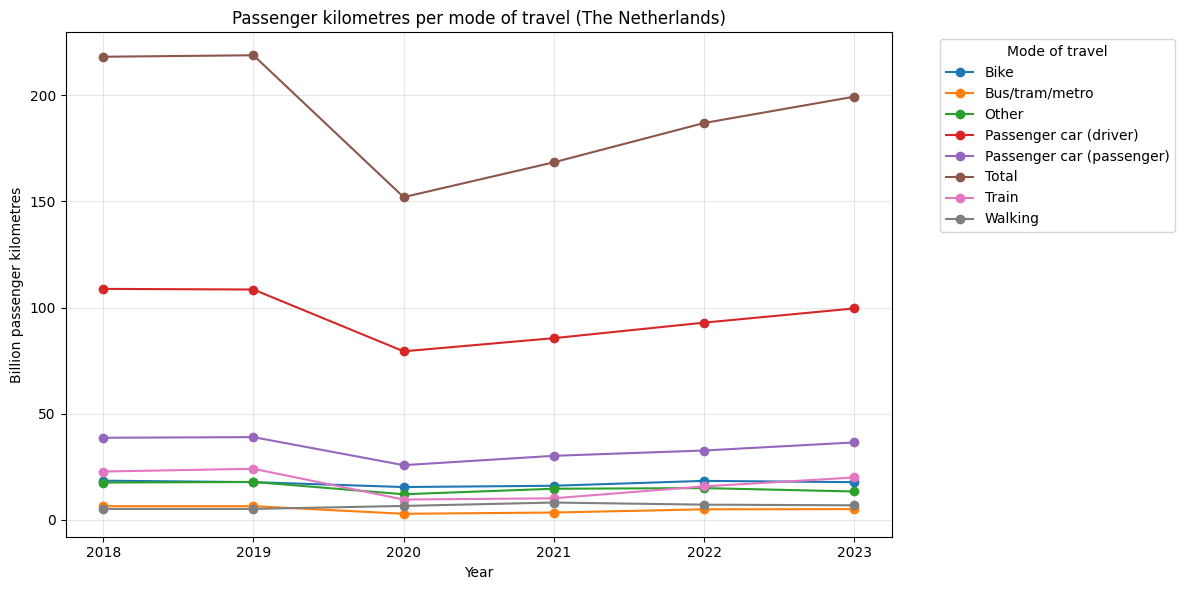

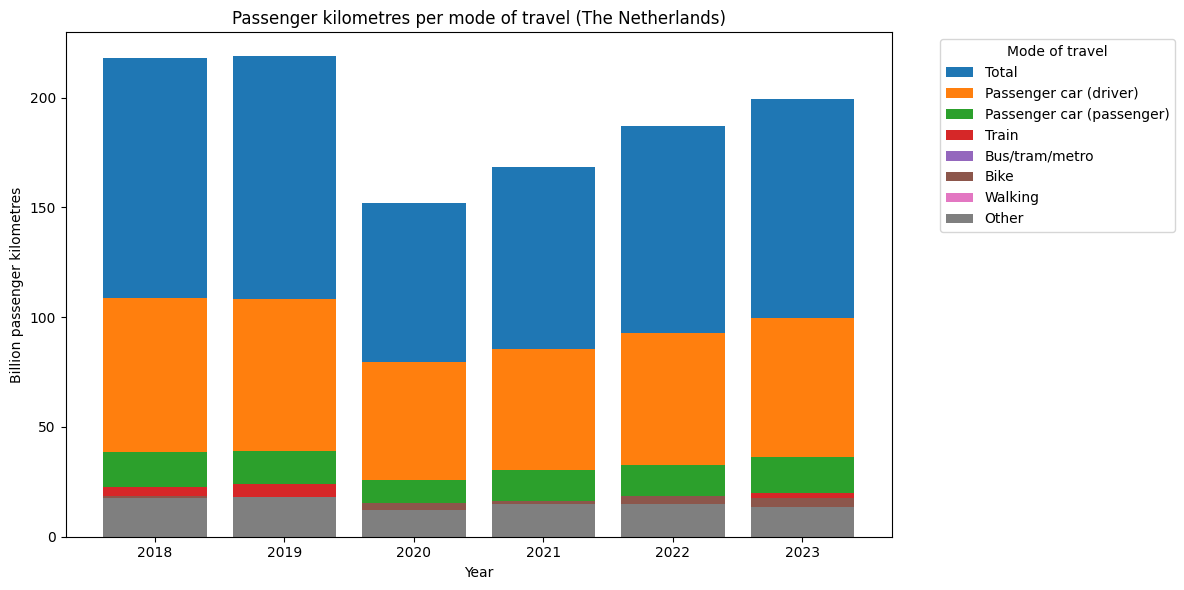

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

df_1 = df_1.dropna(how='all').dropna(axis=1, how='all')

first_col = df_1.columns[0]

#The netherlands filteren
df_1 = df_1[df_1[first_col].astype(str).str.strip().str.lower() == "the netherlands"]
if df_1.empty:
    raise ValueError("Geen rijen gevonden met 'The Netherlands' — controleer de spelling of hoofdletters.")

#index resetten
df_1 = df_1.reset_index(drop=True)

#Mapping each year
year_map = {None: 2018}
base_year = 2018
mapped_cols = {}

for c in df_1.columns:
    match = re.search(r"\.(\d+)$", c)
    if match:
        mapped_cols[c] = base_year + int(match.group(1))
    elif c != first_col:
        mapped_cols[c] = base_year  # Default year if no suffix
    else:
        mapped_cols[c] = c  # 'Modes of travel'


long_df = df_1.melt(id_vars=[first_col], var_name="Mode_raw", value_name="Passenger_km_billion")
long_df["Periods"] = long_df["Mode_raw"].map(mapped_cols)


long_df["Modes of travel"] = long_df["Mode_raw"].str.replace(r"\.\d+$", "", regex=True)

#value cleanse
long_df["Passenger_km_billion"] = (
    long_df["Passenger_km_billion"]
    .astype(str)
    .str.replace(",", ".")
    .str.extract(r"([\d\.]+)")[0]
)
long_df["Passenger_km_billion"] = pd.to_numeric(long_df["Passenger_km_billion"], errors="coerce")
long_df = long_df.dropna(subset=["Passenger_km_billion"])

#plotting
plt.figure(figsize=(12, 6))
for mode in sorted(long_df["Modes of travel"].unique()):
    subset = long_df[long_df["Modes of travel"] == mode]
    plt.plot(subset["Periods"], subset["Passenger_km_billion"], marker="o", label=mode)

plt.title("Passenger kilometres per mode of travel (The Netherlands)")
plt.xlabel("Year")
plt.ylabel("Billion passenger kilometres")
plt.legend(title="Mode of travel", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for mode in long_df["Modes of travel"].unique():
    subset = long_df[long_df["Modes of travel"] == mode]
    plt.bar(subset["Periods"], subset["Passenger_km_billion"], label=mode)

plt.title("Passenger kilometres per mode of travel (The Netherlands)")
plt.xlabel("Year")
plt.ylabel("Billion passenger kilometres")
plt.legend(title="Mode of travel", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(sorted(long_df["Periods"].unique()))
plt.tight_layout()
plt.show()
